In [1]:
import numpy as np
import pandas as pd
import io
import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe


In [3]:
df = pd.read_csv("Data_SR_Grav2.asc.csv")

In [7]:
import numpy as np
grid = np.loadtxt("Data_SR_Grav.asc", skiprows=6)

In [8]:
type(grid)
type(df)


pandas.core.frame.DataFrame

In [15]:
df.head()

,-2814.371493,-2839.42149,-2859.328302,-2874.538824,-2883.714883,-2889.558021,-2893.787904,-2898.011412,-2904.904528,-2912.977152,...,-3441.421261,-3442.88683,-3444.483867,-3446.435979,-3448.526046,-3451.195512,-3452.69278,-3450.694708,-3447.358821,-3443.866046
0,-2849.778996,-2866.819537,-2881.121718,-2892.000111,-2899.810779,-2905.450287,-2909.452096,-2913.262356,-2918.697234,-2925.178127,...,-3441.725241,-3443.337221,-3444.992499,-3446.913681,-3448.735843,-3450.585338,-3451.210858,-3448.725510,-3445.161830,-3441.715618
1,-2874.252762,-2886.658116,-2897.099548,-2904.956869,-2911.629244,-2916.992596,-2921.038616,-2924.819315,-2929.357440,-2934.730546,...,-3442.738097,-3444.490023,-3446.178093,-3447.836656,-3449.134499,-3449.990086,-3449.689371,-3446.902861,-3443.392866,-3440.297095
2,-2886.019096,-2897.442253,-2906.081299,-2912.489254,-2918.507826,-2923.692677,-2928.019636,-2932.070368,-2936.267117,-2941.062624,...,-3444.418729,-3446.263862,-3447.930864,-3449.150120,-3449.764520,-3449.609453,-3448.437897,-3445.460563,-3442.139540,-3439.540007
3,-2893.328527,-2903.391912,-2910.793877,-2916.463710,-2922.105263,-2927.213359,-2931.746655,-2936.019039,-2940.129469,-2944.680430,...,-3446.598724,-3448.221113,-3449.567351,-3450.229656,-3450.171605,-3449.201758,-3447.376274,-3444.276909,-3441.134398,-3438.931161
4,-2897.079313,-2905.329381,-2911.893841,-2917.325951,-2922.813067,-2927.935247,-2932.587113,-2937.012726,-2941.231917,-2945.812564,...,-3449.015676,-3450.110498,-3450.881561,-3450.949133,-3450.316518,-3448.795718,-3446.580717,-3443.441293,-3440.460381,-3438.540559


In [10]:
print(grid)
print(df)

[[-2.81437149e+03 -2.83942149e+03 -2.85932830e+03 ... -3.41313468e+03
  -3.42064702e+03 -3.42962145e+03]
 [-2.84977900e+03 -2.86681954e+03 -2.88112172e+03 ... -3.43077911e+03
  -3.43775254e+03 -3.44598812e+03]
 [-2.87425276e+03 -2.88665812e+03 -2.89709955e+03 ... -3.44737326e+03
  -3.45363611e+03 -3.46092668e+03]
 ...
 [-3.60501534e+03 -3.62769664e+03 -3.64875698e+03 ... -3.42197565e+03
  -3.38907182e+03 -3.35691846e+03]
 [-3.61016439e+03 -3.63077205e+03 -3.65001424e+03 ... -3.41840581e+03
  -3.38493643e+03 -3.35215724e+03]
 [-2.14748365e+09 -2.14748365e+09 -2.14748365e+09 ... -2.14748365e+09
  -2.14748365e+09 -2.14748365e+09]]
     -2814.371493  -2839.42149  -2859.328302  -2874.538824  -2883.714883  \
0    -2849.778996 -2866.819537  -2881.121718  -2892.000111  -2899.810779   
1    -2874.252762 -2886.658116  -2897.099548  -2904.956869  -2911.629244   
2    -2886.019096 -2897.442253  -2906.081299  -2912.489254  -2918.507826   
3    -2893.328527 -2903.391912  -2910.793877  -2916.463710  

In [11]:
df.keys()

Index(['-2814.371493', '-2839.42149', '-2859.328302', '-2874.538824',
       '-2883.714883', '-2889.558021', '-2893.787904', '-2898.011412',
       '-2904.904528', '-2912.977152',
       ...
       '-3441.421261', '-3442.88683', '-3444.483867', '-3446.435979',
       '-3448.526046', '-3451.195512', '-3452.69278', '-3450.694708',
       '-3447.358821', '-3443.866046'],
      dtype='object', length=417)

In [12]:
print(df[:])
print(type(df[:]))

     -2814.371493  -2839.42149  -2859.328302  -2874.538824  -2883.714883  \
0    -2849.778996 -2866.819537  -2881.121718  -2892.000111  -2899.810779   
1    -2874.252762 -2886.658116  -2897.099548  -2904.956869  -2911.629244   
2    -2886.019096 -2897.442253  -2906.081299  -2912.489254  -2918.507826   
3    -2893.328527 -2903.391912  -2910.793877  -2916.463710  -2922.105263   
4    -2897.079313 -2905.329381  -2911.893841  -2917.325951  -2922.813067   
..            ...          ...           ...           ...           ...   
506  -3599.448510 -3627.335696  -3652.759913  -3675.959625  -3697.187966   
507  -3599.032728 -3625.518725  -3649.773767  -3671.886929  -3691.972227   
508  -3601.108503 -3625.764297  -3648.522322  -3669.263458  -3687.917226   
509  -3605.015336 -3627.696644  -3648.756977  -3667.901435  -3684.901599   
510  -3610.164386 -3630.772053  -3650.014242  -3667.437057  -3682.693625   

     -2889.558021  -2893.787904  -2898.011412  -2904.904528  -2912.977152  \
0    -2905

In [13]:
df.head(10)

,-2814.371493,-2839.42149,-2859.328302,-2874.538824,-2883.714883,-2889.558021,-2893.787904,-2898.011412,-2904.904528,-2912.977152,...,-3441.421261,-3442.88683,-3444.483867,-3446.435979,-3448.526046,-3451.195512,-3452.69278,-3450.694708,-3447.358821,-3443.866046
0,-2849.778996,-2866.819537,-2881.121718,-2892.000111,-2899.810779,-2905.450287,-2909.452096,-2913.262356,-2918.697234,-2925.178127,...,-3441.725241,-3443.337221,-3444.992499,-3446.913681,-3448.735843,-3450.585338,-3451.210858,-3448.725510,-3445.161830,-3441.715618
1,-2874.252762,-2886.658116,-2897.099548,-2904.956869,-2911.629244,-2916.992596,-2921.038616,-2924.819315,-2929.357440,-2934.730546,...,-3442.738097,-3444.490023,-3446.178093,-3447.836656,-3449.134499,-3449.990086,-3449.689371,-3446.902861,-3443.392866,-3440.297095
2,-2886.019096,-2897.442253,-2906.081299,-2912.489254,-2918.507826,-2923.692677,-2928.019636,-2932.070368,-2936.267117,-2941.062624,...,-3444.418729,-3446.263862,-3447.930864,-3449.150120,-3449.764520,-3449.609453,-3448.437897,-3445.460563,-3442.139540,-3439.540007
3,-2893.328527,-2903.391912,-2910.793877,-2916.463710,-2922.105263,-2927.213359,-2931.746655,-2936.019039,-2940.129469,-2944.680430,...,-3446.598724,-3448.221113,-3449.567351,-3450.229656,-3450.171605,-3449.201758,-3447.376274,-3444.276909,-3441.134398,-3438.931161
4,-2897.079313,-2905.329381,-2911.893841,-2917.325951,-2922.813067,-2927.935247,-2932.587113,-2937.012726,-2941.231917,-2945.812564,...,-3449.015676,-3450.110498,-3450.881561,-3450.949133,-3450.316518,-3448.795718,-3446.580717,-3443.441293,-3440.460381,-3438.540559
5,-2896.835530,-2904.033386,-2910.223890,-2915.633880,-2920.934423,-2925.964320,-2930.742679,-2935.398542,-2939.930323,-2944.748204,...,-3451.324832,-3451.545940,-3451.571870,-3451.130158,-3450.126711,-3448.269695,-3445.880002,-3442.873086,-3440.173858,-3438.599111
6,-2893.593575,-2900.412500,-2906.521850,-2911.981583,-2917.079027,-2921.966596,-2926.896823,-2931.857105,-2936.859230,-2942.082051,...,-3453.217203,-3452.466312,-3451.762985,-3450.942420,-3449.778291,-3447.866534,-3445.576895,-3442.881001,-3440.568177,-3439.370637
7,-2888.793335,-2895.537981,-2901.543961,-2906.969673,-2912.045112,-2916.989937,-2922.096559,-2927.378022,-2932.977648,-2938.798684,...,-3453.623346,-3452.540002,-3451.684886,-3450.738283,-3449.643389,-3448.208970,-3446.519315,-3444.322299,-3442.434837,-3441.548869
8,-2883.252691,-2890.046512,-2895.892855,-2901.210470,-2906.397097,-2911.560571,-2916.899097,-2922.539980,-2928.791268,-2935.308799,...,-3453.224953,-3452.329503,-3451.732577,-3450.805908,-3449.905711,-3449.338838,-3448.625796,-3447.072190,-3445.628470,-3444.948051
9,-2877.690210,-2884.371306,-2890.189940,-2895.564815,-2900.847871,-2906.212571,-2911.933562,-2918.061110,-2924.862029,-2931.961993,...,-3454.428156,-3453.620279,-3452.938738,-3451.683110,-3450.728961,-3451.170975,-3451.652786,-3450.790210,-3449.760382,-3449.177660


In [16]:
df.describe()

,-2814.371493,-2839.42149,-2859.328302,-2874.538824,-2883.714883,-2889.558021,-2893.787904,-2898.011412,-2904.904528,-2912.977152,...,-3441.421261,-3442.88683,-3444.483867,-3446.435979,-3448.526046,-3451.195512,-3452.69278,-3450.694708,-3447.358821,-3443.866046
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,-2848.235813,-2846.434598,-2845.053178,-2845.132555,-2845.706298,-2848.641131,-2853.286595,-2856.270111,-2856.740344,-2856.613636,...,-2945.589767,-2958.665681,-2971.359731,-2982.599664,-2992.530059,-3001.159725,-3008.452874,-3013.845698,-3017.864663,-3020.353053
std,699.271852,698.571675,702.432246,708.106767,713.240862,717.786563,721.609174,724.652401,725.221527,727.186690,...,643.626302,633.713910,624.316894,614.575779,605.252138,596.657649,590.106042,586.653496,586.002401,587.214165
min,-4015.276573,-4020.863423,-4031.696740,-4042.948530,-4052.010746,-4065.419007,-4075.604507,-4070.747859,-4043.802186,-4049.829494,...,-4011.202439,-4005.949302,-3994.918010,-3968.390908,-3935.688556,-3899.112861,-3870.002415,-3881.926362,-3920.387422,-3961.994757
25%,-3177.669791,-3187.958137,-3209.400527,-3214.846974,-3219.378423,-3226.731387,-3230.848356,-3235.921836,-3222.764694,-3208.087945,...,-3435.593213,-3438.699199,-3446.916686,-3450.744041,-3450.244062,-3452.240875,-3454.336498,-3455.614859,-3455.638004,-3453.878859
50%,-2911.183040,-2915.235436,-2910.409799,-2906.969673,-2891.163247,-2911.560571,-2916.899097,-2936.019039,-2944.812780,-2952.544660,...,-3095.291352,-3097.281361,-3095.035621,-3095.095346,-3102.668745,-3107.911117,-3117.110181,-3123.091287,-3121.885896,-3114.658906
75%,-2492.672061,-2464.227430,-2434.365104,-2431.156486,-2434.906584,-2435.179819,-2456.812679,-2469.381169,-2487.871672,-2504.879246,...,-2621.220345,-2630.485813,-2641.629456,-2648.374638,-2651.850733,-2656.755019,-2666.687136,-2675.444873,-2696.667228,-2702.494072
max,-474.538301,-476.803144,-446.404191,-419.819013,-409.301647,-414.840217,-442.514643,-485.556686,-542.124302,-601.720876,...,-1313.709620,-1332.148397,-1362.586299,-1422.969504,-1500.550682,-1588.794994,-1676.042143,-1713.432524,-1676.010037,-1645.248975


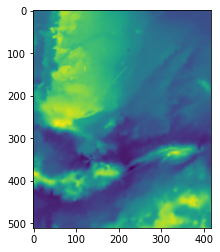

In [18]:
plt.imshow(df)

In [19]:
G=df-df

In [21]:
G+1

,-2814.371493,-2839.42149,-2859.328302,-2874.538824,-2883.714883,-2889.558021,-2893.787904,-2898.011412,-2904.904528,-2912.977152,...,-3441.421261,-3442.88683,-3444.483867,-3446.435979,-3448.526046,-3451.195512,-3452.69278,-3450.694708,-3447.358821,-3443.866046
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
507,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
508,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
509,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
